In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
df1 = pd.read_csv('1.gt_bitcoin.csv', usecols=[2], skiprows=2, names=['1.gt_bitcoin'])
df2 = pd.read_csv('2.gt_Buy_Bitcoin.csv', usecols=[2], skiprows=2, names=['2.gt_Buy_Bitcoin'])
df3 = pd.read_csv('3.gt_Sell_Bitcoin.csv', usecols=[2], skiprows=2, names=['3.gt_Sell_Bitcoin'])
df4 = pd.read_csv('4.gt_ethereum.csv', usecols=[2], skiprows=2, names=['4.gt_ethereum'])
df5 = pd.read_csv('5.gt_Ukraine_war.csv', usecols=[2], skiprows=2, names=['5.gt_Ukraine_war'])
df6 = pd.read_csv('6.gt_covid.csv', usecols=[2], skiprows=2, names=['6.gt_covid'])
df7 = pd.read_csv('7.s&p_twitter.csv', usecols=[2], skiprows=2, names=['7.s&p_twitter'])
df8 = pd.read_csv('8.CBDC_uncertainty.csv', usecols=[2], skiprows=2, names=['8.CBDC_uncertainty'])
df9 = pd.read_csv('9.CBDC_atten.csv', usecols=[2], skiprows=2, names=['9.CBDC_atten'])
df10 = pd.read_csv('10.news_senti.csv', usecols=[2], skiprows=2, names=['10.news_senti'])
df11 = pd.read_csv('11.fear&greed.csv', usecols=[2], skiprows=2, names=['11.fear&greed'])
df12 = pd.read_csv('12.tweets_pos.csv', usecols=[2], skiprows=2, names=['12.tweets_pos'])
df13 = pd.read_csv('13.tweets_neg.csv', usecols=[2], skiprows=2, names=['13.tweets_neg'])
df14 = pd.read_csv('14.twitter_btccrash_pos.csv', usecols=[2], skiprows=2, names=['14.twitter_btccrash_pos'])
df15 = pd.read_csv('15.twitter_btccrash_neg.csv', usecols=[2], skiprows=2, names=['15.twitter_btccrash_neg'])

In [114]:
df_concat = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15], axis=1)
# compute correlation matrix
corr_matrix = df_concat.corr()
corr_matrix

,1.gt_bitcoin,2.gt_Buy_Bitcoin,3.gt_Sell_Bitcoin,4.gt_ethereum,5.gt_Ukraine_war,6.gt_covid,7.s&p_twitter,8.CBDC_uncertainty,9.CBDC_atten,10.news_senti,11.fear&greed,12.tweets_pos,13.tweets_neg,14.twitter_btccrash_pos,15.twitter_btccrash_neg
1.gt_bitcoin,1.000000,0.724550,0.608174,0.393558,0.148465,0.045084,-0.040650,0.038419,0.065266,-0.021430,-0.013121,-0.006569,0.024156,0.024310,0.010037
2.gt_Buy_Bitcoin,0.724550,1.000000,0.517905,0.330452,0.124415,0.051891,-0.014537,-0.003943,0.005189,-0.024027,0.001353,-0.006434,0.014833,0.014386,0.022875
3.gt_Sell_Bitcoin,0.608174,0.517905,1.000000,0.340581,0.013898,0.052945,-0.008840,-0.012673,0.011820,-0.000750,-0.015953,-0.009055,0.032816,-0.001565,0.016842
4.gt_ethereum,0.393558,0.330452,0.340581,1.000000,0.128527,-0.081198,-0.022610,-0.017791,0.018349,-0.017657,0.002942,-0.002339,-0.005038,-0.025160,-0.027628
5.gt_Ukraine_war,0.148465,0.124415,0.013898,0.128527,1.000000,-0.164924,-0.107628,-0.056727,-0.061216,-0.062283,-0.075320,-0.007925,-0.026669,-0.018857,0.042777
6.gt_covid,0.045084,0.051891,0.052945,-0.081198,-0.164924,1.000000,-0.039239,-0.012198,-0.001283,-0.007617,-0.015810,0.007782,-0.006183,-0.023353,0.002949
7.s&p_twitter,-0.040650,-0.014537,-0.008840,-0.022610,-0.107628,-0.039239,1.000000,-0.030043,-0.016614,-0.002824,-0.025225,0.005619,-0.059095,0.018812,0.044575
8.CBDC_uncertainty,0.038419,-0.003943,-0.012673,-0.017791,-0.056727,-0.012198,-0.030043,1.000000,0.682831,0.010775,-0.006246,-0.000869,-0.002390,0.009179,-0.002686
9.CBDC_atten,0.065266,0.005189,0.011820,0.018349,-0.061216,-0.001283,-0.016614,0.682831,1.000000,0.009668,-0.007532,-0.010362,0.007151,0.016506,-0.005518
10.news_senti,-0.021430,-0.024027,-0.000750,-0.017657,-0.062283,-0.007617,-0.002824,0.010775,0.009668,1.000000,-0.045805,0.029324,-0.028730,-0.004097,-0.007002


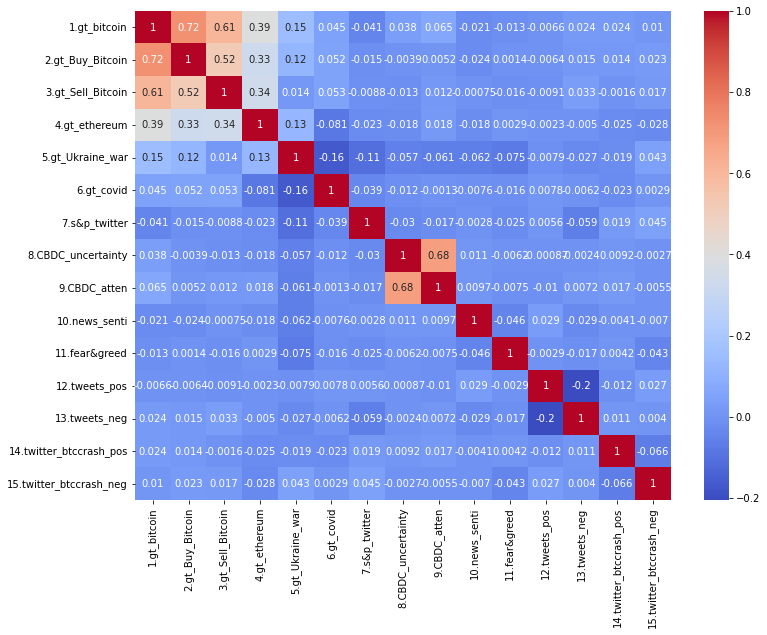

In [115]:
# Plot the correlation matrix as a heatmap
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)

# show the plot
plt.show()

We assume correlation biger than 0.6 means highly correlated.
<li>'gt_bitcoin', 'gt_Buy_Bitcoin','gt_Sell_Bitcoin' are highly correlated. 
<li> 'CBDC_atten','CBDC_uncertainty' are highly correlated.

<b>[1]get bitcoin [2]gt_ethereum [3]gt_Ukraine_war [4]gt_covid [5]sp_twittern [6]CBDC_atten [7]news_senti [8]fear and greed [9]tweets_pos [10]tweets_neg [11]twitter_btccrash_pos [12]twitter_btccrash_neg</b>

In [116]:
df_remove = df_concat.drop(['2.gt_Buy_Bitcoin', '3.gt_Sell_Bitcoin', '8.CBDC_uncertainty'], axis=1)
# replace "inf" with NaN
df_remove = df_remove.replace('inf', 0)
df_remove = df_remove.replace([np.inf, -np.inf], 0)
df_na = df_remove.fillna(0)
df_na

,1.gt_bitcoin,4.gt_ethereum,5.gt_Ukraine_war,6.gt_covid,7.s&p_twitter,9.CBDC_atten,10.news_senti,11.fear&greed,12.tweets_pos,13.tweets_neg,14.twitter_btccrash_pos,15.twitter_btccrash_neg
0,-0.004854,-0.011494,0.000000,0.0,0.006039,0.000321,-0.095687,0.236842,-0.113559,0.514869,-0.138386,0.120306
1,-0.004878,-0.011628,0.000000,0.0,0.003468,-0.000248,-0.097991,0.191489,0.036830,-0.234322,-0.265998,0.381993
2,-0.004902,-0.011765,0.000000,0.0,0.003456,-0.000248,-0.078837,-0.214286,0.063410,0.100377,0.194764,-0.005493
3,0.019704,-0.011905,0.000000,0.0,0.003445,-0.000248,-0.079216,0.250000,-0.097288,-0.182443,-0.223062,-0.145083
4,0.019324,-0.012048,0.000000,0.0,0.001584,-0.000248,-0.051206,0.072727,-0.214515,0.211336,0.090925,0.367505
...,...,...,...,...,...,...,...,...,...,...,...,...
1760,-0.015873,0.142857,-0.011905,0.0,0.000146,-0.000637,-0.202782,-0.034483,-0.192200,0.144226,-0.319385,-0.168254
1761,-0.016129,0.125000,-0.012048,0.0,0.000146,-0.000638,-0.011448,-0.035714,0.172758,0.098971,-0.287368,0.329540
1762,-0.016393,0.111111,-0.012195,0.0,-0.010970,-0.000638,-0.103914,0.037037,-0.127630,0.026982,-0.067539,0.101123
1763,-0.016667,0.100000,-0.012346,0.0,0.013389,-0.000639,-0.064228,0.000000,0.165572,-0.055837,0.233303,-0.110677


In [145]:
bitcoin = pd.read_csv('bitcoin.csv', usecols=[5], skiprows=2, names=['bitcoin'])
ether = pd.read_csv('ethereum.csv', usecols=[5], skiprows=2, names=['ether'])
BDM_exlarge = pd.read_csv('SP_BDM_exlarge.csv', usecols=[5], skiprows=2, names=['BDM_exlarge'])
BDM = pd.read_csv('SP_BDM.csv', usecols=[5], skiprows=2, names=['BDM'])
bitVolumn = pd.read_csv('bitcoin volumn.csv', usecols=[1], names=['bitcoinVolumn'])
bitVolumn = bitVolumn['bitcoinVolumn'].pct_change()
bitVolumnpct= bitVolumn.drop([0], axis=0)
bitVolumnpct = bitVolumnpct.reset_index(drop=True)
sp500 = pd.read_csv('SP500.csv', usecols=[1], names=['sp500'])
sp500 = sp500['sp500'].pct_change()
sp500pct= sp500.drop([0], axis=0)
sp500pct = sp500pct.reset_index(drop=True)
df_control = pd.concat([df_na,bitVolumnpct,sp500pct], axis=1)

# 1. Bitcoin

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.664587
         Iterations 8


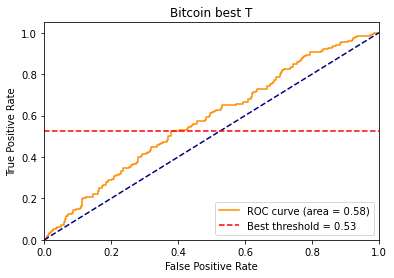

In [168]:
bitcoin_concat = pd.concat([bitcoin,df_na], axis=1)
train, test = train_test_split(bitcoin_concat, test_size = 0.3)
x_train = train.iloc[0:,1:13]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:13]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
# predict probabilities for the test set
y_prob = result.predict(x_test)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# find the best threshold
best_threshold = thresholds[np.argmax(tpr - fpr)]

# plot ROC curve and mark best threshold
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([0, 1], [tpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)]], color='red', linestyle='--', label='Best threshold = %0.2f' % best_threshold)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bitcoin best T')
plt.legend(loc="lower right")
plt.show()

In [169]:
# use the best threshold to make binary predictions
y_pred = (y_prob >= best_threshold).astype(int)
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# print accuracy and confusion matrix
print('Accuracy:', accuracy)
print('best_threshold:',best_threshold)
print('Confusion matrix:')
print(conf_matrix)
result.summary()

Accuracy: 0.5716981132075472
best_threshold: 0.5346733663028838
Confusion matrix:
[[159  97]
 [130 144]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                bitcoin   No. Observations:                 1235
Model:                          Logit   Df Residuals:                     1222
Method:                           MLE   Df Model:                           12
Date:                Mon, 20 Feb 2023   Pseudo R-squ.:                 0.04020
Time:                        00:19:56   Log-Likelihood:                -820.77
converged:                       True   LL-Null:                       -855.14
Covariance Type:            nonrobust   LLR p-value:                 5.474e-10
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0944      0.061      1.543      0.123      -0.026       0.214
1.gt_bitcoin                0.0973      1.940      0.050      0.960      -3.704       3.899
4.gt_ethereum               1.0333      1.144      0.903      0.366      -1.208       3.275
5.gt_Ukraine_war            0.8169      0.607      1.346      0.178      -0.373       2.007
6.gt_covid                 -0.5311      1.401     -0.379      0.705      -3.278       2.216
7.s&p_twitter              36.0980      6.969      5.180      0.000      22.439      49.757
9.CBDC_atten              172.4641     73.461      2.348      0.019      28.484     316.444
10.news_senti              -0.0022      0.004     -0.571      0.568      -0.010       0.005
11.fear&greed              -0.3199      0.266     -1.204      0.229      -0.841       0.201
12.tweets_pos              -0.4351      0.423     -1.028      0.304      -1.264       0.394
13.tweets_neg              -1.1745      0.256     -4.592      0.000      -1.676      -0.673
14.twitter_btccrash_pos    -0.0044      0.025     -0.173      0.863      -0.054       0.045
15.twitter_btccrash_neg     0.0915      0.089      1.027      0.305      -0.083       0.266
===========================================================================================
"""

## control

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.664412
         Iterations 7


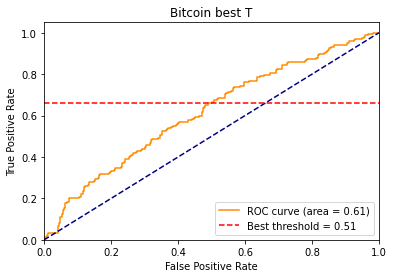

In [152]:
bitcoin_control = pd.concat([bitcoin,df_control], axis=1)
train, test = train_test_split(bitcoin_control, test_size = 0.3)
x_train = train.iloc[0:,1:15]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:15]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
# predict probabilities for the test set
y_prob = result.predict(x_test)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# find the best threshold
best_threshold = thresholds[np.argmax(tpr - fpr)]

# plot ROC curve and mark best threshold
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([0, 1], [tpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)]], color='red', linestyle='--', label='Best threshold = %0.2f' % best_threshold)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bitcoin best T')
plt.legend(loc="lower right")
plt.show()

In [153]:
# use the best threshold to make binary predictions
y_pred = (y_prob >= best_threshold).astype(int)
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# print accuracy and confusion matrix
print('Accuracy:', accuracy)
print('best_threshold:',best_threshold)
print('Confusion matrix:')
print(conf_matrix)
result.summary()

Accuracy: 0.5849056603773585
best_threshold: 0.5090911505389022
Confusion matrix:
[[138 132]
 [ 88 172]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                bitcoin   No. Observations:                 1235
Model:                          Logit   Df Residuals:                     1220
Method:                           MLE   Df Model:                           14
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                 0.03890
Time:                        23:55:58   Log-Likelihood:                -820.55
converged:                       True   LL-Null:                       -853.76
Covariance Type:            nonrobust   LLR p-value:                 8.526e-09
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1300      0.061      2.128      0.033       0.010       0.250
1.gt_bitcoin                1.0585      1.886      0.561      0.575      -2.638       4.755
4.gt_ethereum               0.6253      1.130      0.554      0.580      -1.589       2.839
5.gt_Ukraine_war            1.0639      0.702      1.515      0.130      -0.312       2.440
6.gt_covid                  0.4703      1.443      0.326      0.745      -2.358       3.299
7.s&p_twitter             -32.6750     32.170     -1.016      0.310     -95.728      30.378
9.CBDC_atten              101.9986     72.943      1.398      0.162     -40.968     244.965
10.news_senti              -0.0022      0.004     -0.574      0.566      -0.010       0.005
11.fear&greed              -0.0091      0.222     -0.041      0.968      -0.445       0.426
12.tweets_pos              -0.1188      0.440     -0.270      0.787      -0.981       0.743
13.tweets_neg              -1.2024      0.261     -4.603      0.000      -1.714      -0.690
14.twitter_btccrash_pos    -0.0157      0.026     -0.599      0.549      -0.067       0.036
15.twitter_btccrash_neg     0.0152      0.074      0.205      0.838      -0.131       0.161
bitcoinVolumn               0.4910      0.273      1.799      0.072      -0.044       1.026
sp500                      66.5517     30.957      2.150      0.032       5.877     127.227
===========================================================================================
"""

# 2. Ether

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.663777
         Iterations 9


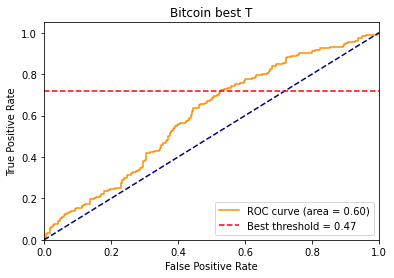

In [154]:
ether_concat = pd.concat([ether,df_na], axis=1)
train, test = train_test_split(ether_concat, test_size = 0.3)
x_train = train.iloc[0:,1:13]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:13]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
# predict probabilities for the test set
y_prob = result.predict(x_test)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# find the best threshold
best_threshold = thresholds[np.argmax(tpr - fpr)]

# plot ROC curve and mark best threshold
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([0, 1], [tpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)]], color='red', linestyle='--', label='Best threshold = %0.2f' % best_threshold)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bitcoin best T')
plt.legend(loc="lower right")
plt.show()

In [155]:
# use the best threshold to make binary predictions
y_pred = (y_prob >= best_threshold).astype(int)
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# print accuracy and confusion matrix
print('Accuracy:', accuracy)
print('best_threshold:',best_threshold)
print('Confusion matrix:')
print(conf_matrix)
result.summary()

Accuracy: 0.6094339622641509
best_threshold: 0.46740835989743384
Confusion matrix:
[[114 126]
 [ 81 209]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  ether   No. Observations:                 1235
Model:                          Logit   Df Residuals:                     1222
Method:                           MLE   Df Model:                           12
Date:                Mon, 20 Feb 2023   Pseudo R-squ.:                 0.04229
Time:                        00:01:45   Log-Likelihood:                -819.77
converged:                       True   LL-Null:                       -855.97
Covariance Type:            nonrobust   LLR p-value:                 1.133e-10
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0072      0.061     -0.118      0.906      -0.126       0.112
1.gt_bitcoin               -0.3130      1.832     -0.171      0.864      -3.903       3.277
4.gt_ethereum               1.5741      1.154      1.365      0.172      -0.687       3.835
5.gt_Ukraine_war           -0.2256      0.640     -0.353      0.724      -1.480       1.029
6.gt_covid                 -1.8549      2.018     -0.919      0.358      -5.810       2.100
7.s&p_twitter              39.0277      7.024      5.556      0.000      25.261      52.794
9.CBDC_atten               83.4108     74.477      1.120      0.263     -62.561     229.382
10.news_senti              -0.0028      0.006     -0.425      0.671      -0.015       0.010
11.fear&greed              -0.2213      0.265     -0.834      0.404      -0.741       0.299
12.tweets_pos               0.5695      0.428      1.331      0.183      -0.269       1.408
13.tweets_neg              -1.1937      0.257     -4.652      0.000      -1.697      -0.691
14.twitter_btccrash_pos     0.0066      0.027      0.246      0.806      -0.046       0.059
15.twitter_btccrash_neg     0.0002      0.106      0.002      0.999      -0.207       0.207
===========================================================================================
"""

## Control

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.659961
         Iterations 8


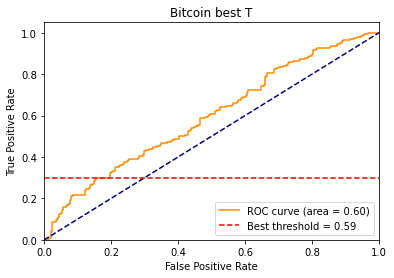

In [158]:
ether_control = pd.concat([ether,df_control], axis=1)
train, test = train_test_split(ether_control, test_size = 0.3)
x_train = train.iloc[0:,1:15]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:15]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
# predict probabilities for the test set
y_prob = result.predict(x_test)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# find the best threshold
best_threshold = thresholds[np.argmax(tpr - fpr)]

# plot ROC curve and mark best threshold
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([0, 1], [tpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)]], color='red', linestyle='--', label='Best threshold = %0.2f' % best_threshold)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bitcoin best T')
plt.legend(loc="lower right")
plt.show()

In [159]:
# use the best threshold to make binary predictions
y_pred = (y_prob >= best_threshold).astype(int)
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# print accuracy and confusion matrix
print('Accuracy:', accuracy)
print('best_threshold:',best_threshold)
print('Confusion matrix:')
print(conf_matrix)
result.summary()

Accuracy: 0.569811320754717
best_threshold: 0.5928778097085187
Confusion matrix:
[[223  41]
 [187  79]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  ether   No. Observations:                 1235
Model:                          Logit   Df Residuals:                     1220
Method:                           MLE   Df Model:                           14
Date:                Mon, 20 Feb 2023   Pseudo R-squ.:                 0.04732
Time:                        00:03:32   Log-Likelihood:                -815.05
converged:                       True   LL-Null:                       -855.54
Covariance Type:            nonrobust   LLR p-value:                 1.864e-11
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0655      0.062      1.055      0.292      -0.056       0.187
1.gt_bitcoin               -0.1384      1.849     -0.075      0.940      -3.762       3.485
4.gt_ethereum               2.0392      1.195      1.706      0.088      -0.304       4.382
5.gt_Ukraine_war            0.3507      0.671      0.522      0.601      -0.965       1.666
6.gt_covid                  1.5368      1.562      0.984      0.325      -1.524       4.597
7.s&p_twitter             -38.4043     33.364     -1.151      0.250    -103.797      26.988
9.CBDC_atten              107.2037     72.840      1.472      0.141     -35.561     249.968
10.news_senti              -0.0024      0.005     -0.507      0.612      -0.012       0.007
11.fear&greed              -0.0682      0.235     -0.290      0.772      -0.529       0.393
12.tweets_pos               0.4673      0.428      1.091      0.275      -0.372       1.307
13.tweets_neg              -0.9399      0.255     -3.680      0.000      -1.440      -0.439
14.twitter_btccrash_pos     0.0242      0.037      0.651      0.515      -0.049       0.097
15.twitter_btccrash_neg    -0.0487      0.078     -0.623      0.533      -0.202       0.104
bitcoinVolumn               0.3531      0.265      1.332      0.183      -0.166       0.873
sp500                      80.5532     32.150      2.506      0.012      17.540     143.567
===========================================================================================
"""

# 3.BDM_exlarge 

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.656474
         Iterations 6


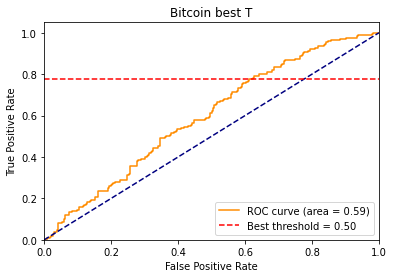

In [160]:
BDM_exlarge_concat = pd.concat([BDM_exlarge,df_na], axis=1)
train, test = train_test_split(BDM_exlarge_concat, test_size = 0.3)
x_train = train.iloc[0:,1:13]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:13]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
# predict probabilities for the test set
y_prob = result.predict(x_test)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# find the best threshold
best_threshold = thresholds[np.argmax(tpr - fpr)]

# plot ROC curve and mark best threshold
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([0, 1], [tpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)]], color='red', linestyle='--', label='Best threshold = %0.2f' % best_threshold)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bitcoin best T')
plt.legend(loc="lower right")
plt.show()

In [161]:
# use the best threshold to make binary predictions
y_pred = (y_prob >= best_threshold).astype(int)
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# print accuracy and confusion matrix
print('Accuracy:', accuracy)
print('best_threshold:',best_threshold)
print('Confusion matrix:')
print(conf_matrix)
result.summary()

Accuracy: 0.6
best_threshold: 0.4993230533278258
Confusion matrix:
[[ 94 148]
 [ 64 224]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            BDM_exlarge   No. Observations:                 1235
Model:                          Logit   Df Residuals:                     1222
Method:                           MLE   Df Model:                           12
Date:                Mon, 20 Feb 2023   Pseudo R-squ.:                 0.04981
Time:                        00:05:04   Log-Likelihood:                -810.75
converged:                       True   LL-Null:                       -853.25
Covariance Type:            nonrobust   LLR p-value:                 4.551e-13
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1223      0.061      1.994      0.046       0.002       0.243
1.gt_bitcoin               -3.6003      1.860     -1.936      0.053      -7.245       0.044
4.gt_ethereum               2.0037      1.141      1.756      0.079      -0.233       4.240
5.gt_Ukraine_war            0.1968      0.606      0.325      0.746      -0.992       1.385
6.gt_covid                  2.1970      1.777      1.236      0.216      -1.286       5.680
7.s&p_twitter              56.1780      7.683      7.312      0.000      41.119      71.237
9.CBDC_atten              -16.4590     74.227     -0.222      0.825    -161.941     129.023
10.news_senti              -0.0177      0.044     -0.403      0.687      -0.104       0.069
11.fear&greed               0.6536      0.288      2.270      0.023       0.089       1.218
12.tweets_pos              -0.1912      0.422     -0.453      0.651      -1.018       0.636
13.tweets_neg              -0.4107      0.243     -1.692      0.091      -0.886       0.065
14.twitter_btccrash_pos    -0.0072      0.025     -0.285      0.776      -0.057       0.042
15.twitter_btccrash_neg     0.0863      0.094      0.920      0.358      -0.098       0.270
===========================================================================================
"""

## Control:

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.657426
         Iterations 6


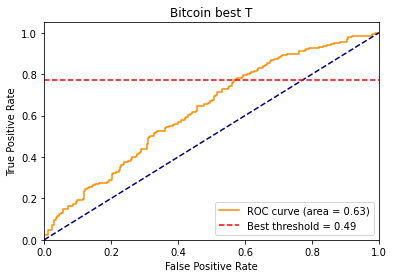

In [162]:
BDM_exlarge_control = pd.concat([BDM_exlarge,df_control], axis=1)
train, test = train_test_split(BDM_exlarge_control, test_size = 0.3)
x_train = train.iloc[0:,1:15]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:15]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
# predict probabilities for the test set
y_prob = result.predict(x_test)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# find the best threshold
best_threshold = thresholds[np.argmax(tpr - fpr)]

# plot ROC curve and mark best threshold
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([0, 1], [tpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)]], color='red', linestyle='--', label='Best threshold = %0.2f' % best_threshold)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bitcoin best T')
plt.legend(loc="lower right")
plt.show()

In [163]:
# use the best threshold to make binary predictions
y_pred = (y_prob >= best_threshold).astype(int)
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# print accuracy and confusion matrix
print('Accuracy:', accuracy)
print('best_threshold:',best_threshold)
print('Confusion matrix:')
print(conf_matrix)
result.summary()

Accuracy: 0.6113207547169811
best_threshold: 0.49139100479543635
Confusion matrix:
[[109 143]
 [ 63 215]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            BDM_exlarge   No. Observations:                 1235
Model:                          Logit   Df Residuals:                     1220
Method:                           MLE   Df Model:                           14
Date:                Mon, 20 Feb 2023   Pseudo R-squ.:                 0.04675
Time:                        00:06:59   Log-Likelihood:                -811.92
converged:                       True   LL-Null:                       -851.74
Covariance Type:            nonrobust   LLR p-value:                 3.313e-11
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1615      0.062      2.618      0.009       0.041       0.282
1.gt_bitcoin               -3.8386      1.910     -2.010      0.044      -7.582      -0.095
4.gt_ethereum               1.3317      1.157      1.151      0.250      -0.936       3.599
5.gt_Ukraine_war            0.2662      0.554      0.480      0.631      -0.820       1.352
6.gt_covid                  2.8318      2.283      1.240      0.215      -1.643       7.307
7.s&p_twitter            -120.2943     36.561     -3.290      0.001    -191.953     -48.636
9.CBDC_atten              -22.8795     73.398     -0.312      0.755    -166.736     120.977
10.news_senti              -0.0363      0.048     -0.758      0.448      -0.130       0.057
11.fear&greed               0.6090      0.267      2.282      0.023       0.086       1.132
12.tweets_pos              -0.3772      0.440     -0.857      0.391      -1.239       0.485
13.tweets_neg              -0.4835      0.245     -1.977      0.048      -0.963      -0.004
14.twitter_btccrash_pos    -0.0075      0.025     -0.300      0.764      -0.056       0.041
15.twitter_btccrash_neg     0.0075      0.085      0.088      0.930      -0.159       0.174
bitcoinVolumn              -0.0912      0.278     -0.328      0.743      -0.636       0.453
sp500                     158.5864     35.530      4.463      0.000      88.949     228.223
===========================================================================================
"""

# 4.BDM

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.656615
         Iterations 11


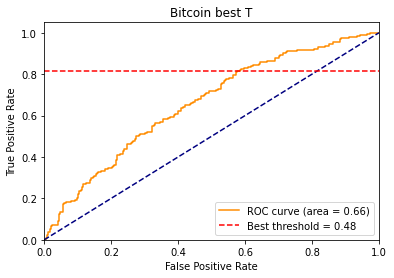

In [164]:
BDM_concat = pd.concat([BDM,df_na], axis=1)
train, test = train_test_split(BDM_concat, test_size = 0.3)
x_train = train.iloc[0:,1:13]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:13]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
# predict probabilities for the test set
y_prob = result.predict(x_test)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# find the best threshold
best_threshold = thresholds[np.argmax(tpr - fpr)]

# plot ROC curve and mark best threshold
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([0, 1], [tpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)]], color='red', linestyle='--', label='Best threshold = %0.2f' % best_threshold)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bitcoin best T')
plt.legend(loc="lower right")
plt.show()

In [165]:
# use the best threshold to make binary predictions
y_pred = (y_prob >= best_threshold).astype(int)
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# print accuracy and confusion matrix
print('Accuracy:', accuracy)
print('best_threshold:',best_threshold)
print('Confusion matrix:')
print(conf_matrix)
result.summary()

Accuracy: 0.6320754716981132
best_threshold: 0.4840941641108293
Confusion matrix:
[[105 143]
 [ 52 230]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    BDM   No. Observations:                 1235
Model:                          Logit   Df Residuals:                     1222
Method:                           MLE   Df Model:                           12
Date:                Mon, 20 Feb 2023   Pseudo R-squ.:                 0.05004
Time:                        00:08:23   Log-Likelihood:                -810.92
converged:                       True   LL-Null:                       -853.63
Covariance Type:            nonrobust   LLR p-value:                 3.760e-13
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1307      0.061      2.135      0.033       0.011       0.251
1.gt_bitcoin                1.3725      1.949      0.704      0.481      -2.448       5.193
4.gt_ethereum               2.3829      1.148      2.075      0.038       0.132       4.634
5.gt_Ukraine_war            0.8091      0.682      1.187      0.235      -0.527       2.145
6.gt_covid                  0.0661      1.496      0.044      0.965      -2.865       2.997
7.s&p_twitter              53.8770      7.734      6.966      0.000      38.718      69.036
9.CBDC_atten              -54.7657     77.934     -0.703      0.482    -207.513      97.981
10.news_senti              -0.0809      0.069     -1.178      0.239      -0.215       0.054
11.fear&greed               0.5740      0.271      2.117      0.034       0.043       1.105
12.tweets_pos              -0.4129      0.427     -0.967      0.334      -1.250       0.424
13.tweets_neg              -0.6017      0.247     -2.434      0.015      -1.086      -0.117
14.twitter_btccrash_pos    -0.0053      0.026     -0.208      0.835      -0.055       0.045
15.twitter_btccrash_neg    -0.0351      0.086     -0.407      0.684      -0.204       0.134
===========================================================================================
"""

## Control

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.647314
         Iterations 11


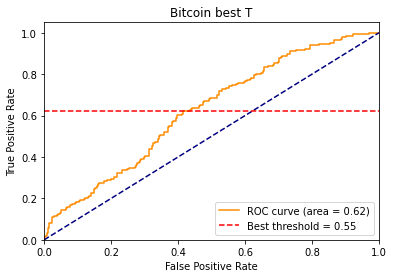

In [166]:
BDM_control = pd.concat([BDM,df_control], axis=1)
train, test = train_test_split(BDM_control, test_size = 0.3)
x_train = train.iloc[0:,1:15]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:15]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
# predict probabilities for the test set
y_prob = result.predict(x_test)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# find the best threshold
best_threshold = thresholds[np.argmax(tpr - fpr)]

# plot ROC curve and mark best threshold
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([0, 1], [tpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)]], color='red', linestyle='--', label='Best threshold = %0.2f' % best_threshold)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bitcoin best T')
plt.legend(loc="lower right")
plt.show()

In [167]:
# use the best threshold to make binary predictions
y_pred = (y_prob >= best_threshold).astype(int)
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# print accuracy and confusion matrix
print('Accuracy:', accuracy)
print('best_threshold:',best_threshold)
print('Confusion matrix:')
print(conf_matrix)
result.summary()

Accuracy: 0.6037735849056604
best_threshold: 0.5490835262897314
Confusion matrix:
[[153 109]
 [101 167]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    BDM   No. Observations:                 1235
Model:                          Logit   Df Residuals:                     1220
Method:                           MLE   Df Model:                           14
Date:                Mon, 20 Feb 2023   Pseudo R-squ.:                 0.06122
Time:                        00:09:32   Log-Likelihood:                -799.43
converged:                       True   LL-Null:                       -851.57
Covariance Type:            nonrobust   LLR p-value:                 7.171e-16
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1694      0.063      2.696      0.007       0.046       0.293
1.gt_bitcoin                0.1582      1.936      0.082      0.935      -3.637       3.953
4.gt_ethereum               2.7241      1.176      2.316      0.021       0.419       5.029
5.gt_Ukraine_war           -0.4539      0.628     -0.723      0.470      -1.685       0.777
6.gt_covid                  1.1751      1.711      0.687      0.492      -2.178       4.529
7.s&p_twitter             -47.0119     32.893     -1.429      0.153    -111.481      17.458
9.CBDC_atten               -1.6647     77.655     -0.021      0.983    -153.865     150.536
10.news_senti              -0.1159      0.093     -1.250      0.211      -0.298       0.066
11.fear&greed               0.7793      0.269      2.898      0.004       0.252       1.306
12.tweets_pos              -0.7511      0.441     -1.701      0.089      -1.616       0.114
13.tweets_neg              -0.5819      0.248     -2.347      0.019      -1.068      -0.096
14.twitter_btccrash_pos     0.0402      0.039      1.040      0.298      -0.036       0.116
15.twitter_btccrash_neg    -0.0018      0.074     -0.024      0.981      -0.147       0.143
bitcoinVolumn               0.2702      0.275      0.981      0.326      -0.269       0.810
sp500                     100.5679     31.713      3.171      0.002      38.412     162.724
===========================================================================================
"""